In [20]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [12, 6]


filenumber = 1353
#Kijk of je inderdaad twee mappen omhoog wil of maar één
# Lees de bestanden van het circuit as pandas DataFrame
cableconfig = pd.read_csv("../../data/origineel/" + str(filenumber) + "-cableconfig.csv", sep=";")
partialdischarges = pd.read_csv("../../data/origineel/" + str(filenumber) + "-pd.csv", sep=";")


In [21]:
cableconfig.head()

,Component type,Length (m),Cumulative length (m)
0,RMU,NaN,0.00
1,Termination (unknown),NaN,0.00
2,"Cable (PILC, 3 cores, belted)",32.59,32.59
3,Joint (oil),NaN,32.59
4,"Cable (PILC, 3 cores, belted)",277.36,309.95


In [22]:
# Namen van de kolommen
time_col, location_col, charge_col = partialdischarges.columns

# Check that each row either has location and charge undefinied, or both defined:
for i in np.arange(len(partialdischarges))[np.isnan(partialdischarges[location_col]) != np.isnan(partialdischarges[charge_col])]:
    raise Warning(f"Row {i} has missing values")

# Lijst met bools die aangeeft of er op dat tijdstip een PD was
pd_occured = ~np.isnan(partialdischarges[location_col])

# De drie kolommen; alleen op tijdstippen met PD
locations = partialdischarges[location_col][pd_occured]
charges = partialdischarges[charge_col][pd_occured]
times = partialdischarges[time_col][pd_occured].apply(datetime.datetime.fromisoformat)

# Hieronder worden verticale lijnen toegevoegd aan een scatterplot

In [23]:
def add_config(cableconfig):
    # Namen van de kolommen
    type_col, length_col, cum_length_col = cableconfig.columns

    rmu = cableconfig[cableconfig[type_col]=="RMU"]
    joints = cableconfig[ cableconfig[type_col].str.startswith("Joint") ]

    for joint_loc in joints[cum_length_col]:
        plt.axvline(x=joint_loc,color="red")
    for rmu_loc in rmu[cum_length_col]:
        plt.axvline(x=rmu_loc,color="blue")    


In [24]:
#def add_config_diff(cableconfig):
    

<IPython.core.display.Javascript object>


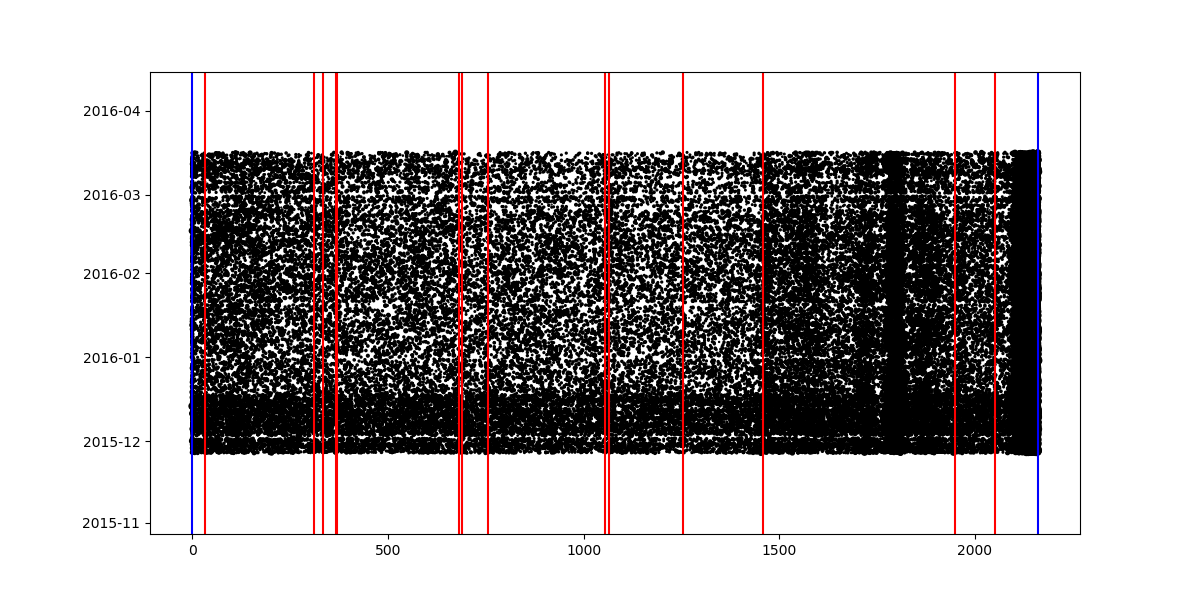

In [25]:
%matplotlib notebook

plt.scatter(x=locations, y=times, s=charges/1e4, c='.0')
add_config(cableconfig)
plt.show()